## Import necessary libraries

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import copy

## Load the vehicle dataset

In [3]:
vehicle = pd.read_csv("vehicle.csv") #load the dataset vehicle into dataframe vehicle

In [4]:
vehicle.head() #check if data has loaded properly

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
vehicle.shape

(846, 19)

The dataset has 846 rows and 19 columns. 4 columns are of integer type, 14 are float type and one column is categorical. The data seems to contain null values.

In [7]:
vehicle.describe().T #5 point summary

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

The columns such as radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio,scaled_variance.1, scaled_radius_of_gyration.1 appears to be skewed. 

In [8]:
vehicle.isna().apply(pd.value_counts) #finding missing values

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

There are no missing values in compactness, max.length_aspect_ratio, max.length_rectangularity,hollows_ratio and class. Other columns have missing values.

In [9]:
missing_val_col = vehicle.columns[vehicle.isnull().any()] #columns contaning missing values
missing_val_col

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')

In [10]:
pd.DataFrame(vehicle[missing_val_col].isnull().sum(), columns = ['Number of missing values']) #number of missing values in each column

Number of missing values
circularity                                         5
distance_circularity                                4
radius_ratio                                        6
pr.axis_aspect_ratio                                2
scatter_ratio                                       1
elongatedness                                       1
pr.axis_rectangularity                              3
scaled_variance                                     3
scaled_variance.1                                   2
scaled_radius_of_gyration                           2
scaled_radius_of_gyration.1                         4
skewness_about                                      6
skewness_about.1                                    1
skewness_about.2                                    1

In [11]:
vehicle[vehicle.isnull().any(axis=1)].shape

(33, 19)

There are 33 rows with missing values in one or more columns

In [12]:
for column in missing_val_col:
    print(column)
    print(vehicle[vehicle[column].isnull() == True][column]) #displaying only rows that contain missing value for each column

circularity
5     NaN
105   NaN
118   NaN
266   NaN
396   NaN
Name: circularity, dtype: float64
distance_circularity
35    NaN
118   NaN
207   NaN
319   NaN
Name: distance_circularity, dtype: float64
radius_ratio
9     NaN
78    NaN
159   NaN
287   NaN
345   NaN
467   NaN
Name: radius_ratio, dtype: float64
pr.axis_aspect_ratio
19    NaN
222   NaN
Name: pr.axis_aspect_ratio, dtype: float64
scatter_ratio
249   NaN
Name: scatter_ratio, dtype: float64
elongatedness
215   NaN
Name: elongatedness, dtype: float64
pr.axis_rectangularity
70    NaN
237   NaN
273   NaN
Name: pr.axis_rectangularity, dtype: float64
scaled_variance
105   NaN
372   NaN
522   NaN
Name: scaled_variance, dtype: float64
scaled_variance.1
308   NaN
496   NaN
Name: scaled_variance.1, dtype: float64
scaled_radius_of_gyration
207   NaN
266   NaN
Name: scaled_radius_of_gyration, dtype: float64
scaled_radius_of_gyration.1
66    NaN
77    NaN
192   NaN
329   NaN
Name: scaled_radius_of_gyration.1, dtype: float64
skewness_about
6

### Dealing with missing values

In [13]:
# splitting the dataframe into three according to their classes
vehicle_bus = vehicle[vehicle['class']=='bus']
vehicle_van = vehicle[vehicle['class']=='van']
vehicle_car = vehicle[vehicle['class']=='car']
# replacing outliers in columns in each class with the median value of the respective class
for column in missing_val_col:
    vehicle_bus[column].fillna(vehicle_bus[column].median(),inplace = True) #replacing missing values in class bus with the median value
for column in missing_val_col:
    vehicle_van[column].fillna(vehicle_van[column].median(),inplace = True) #replacing missing values in class van with the median value
for column in missing_val_col:
    vehicle_car[column].fillna(vehicle_car[column].median(),inplace = True) #replacing missing values in calss car with the median value

df_vehicle= pd.concat([vehicle_bus,vehicle_van,vehicle_car]) #combining the three dataframes back into one dataframe

df_vehicle.isna().apply(pd.value_counts) #checking to find if all the missing values have been dealt with

C:\Users\Welcome\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


compactness  circularity  distance_circularity  radius_ratio  \
False          846          846                   846           846   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   846                      846            846   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            846                     846                        846   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              846                846                        846   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          846             846               846   

       skewness_about.2  hollows_ratio  class  
False               846            846    846

There are no missing values in all columns

In [14]:
df_vehicle.shape #checking the shape of the dataframe to see if it contains all the rows and columns of original dataframe

(846, 19)

## Univariate analysis and its distribution

In [15]:
vehicle["class"].value_counts() #finding the distribution of various classes

car    429
bus    218
van    199
Name: class, dtype: int64

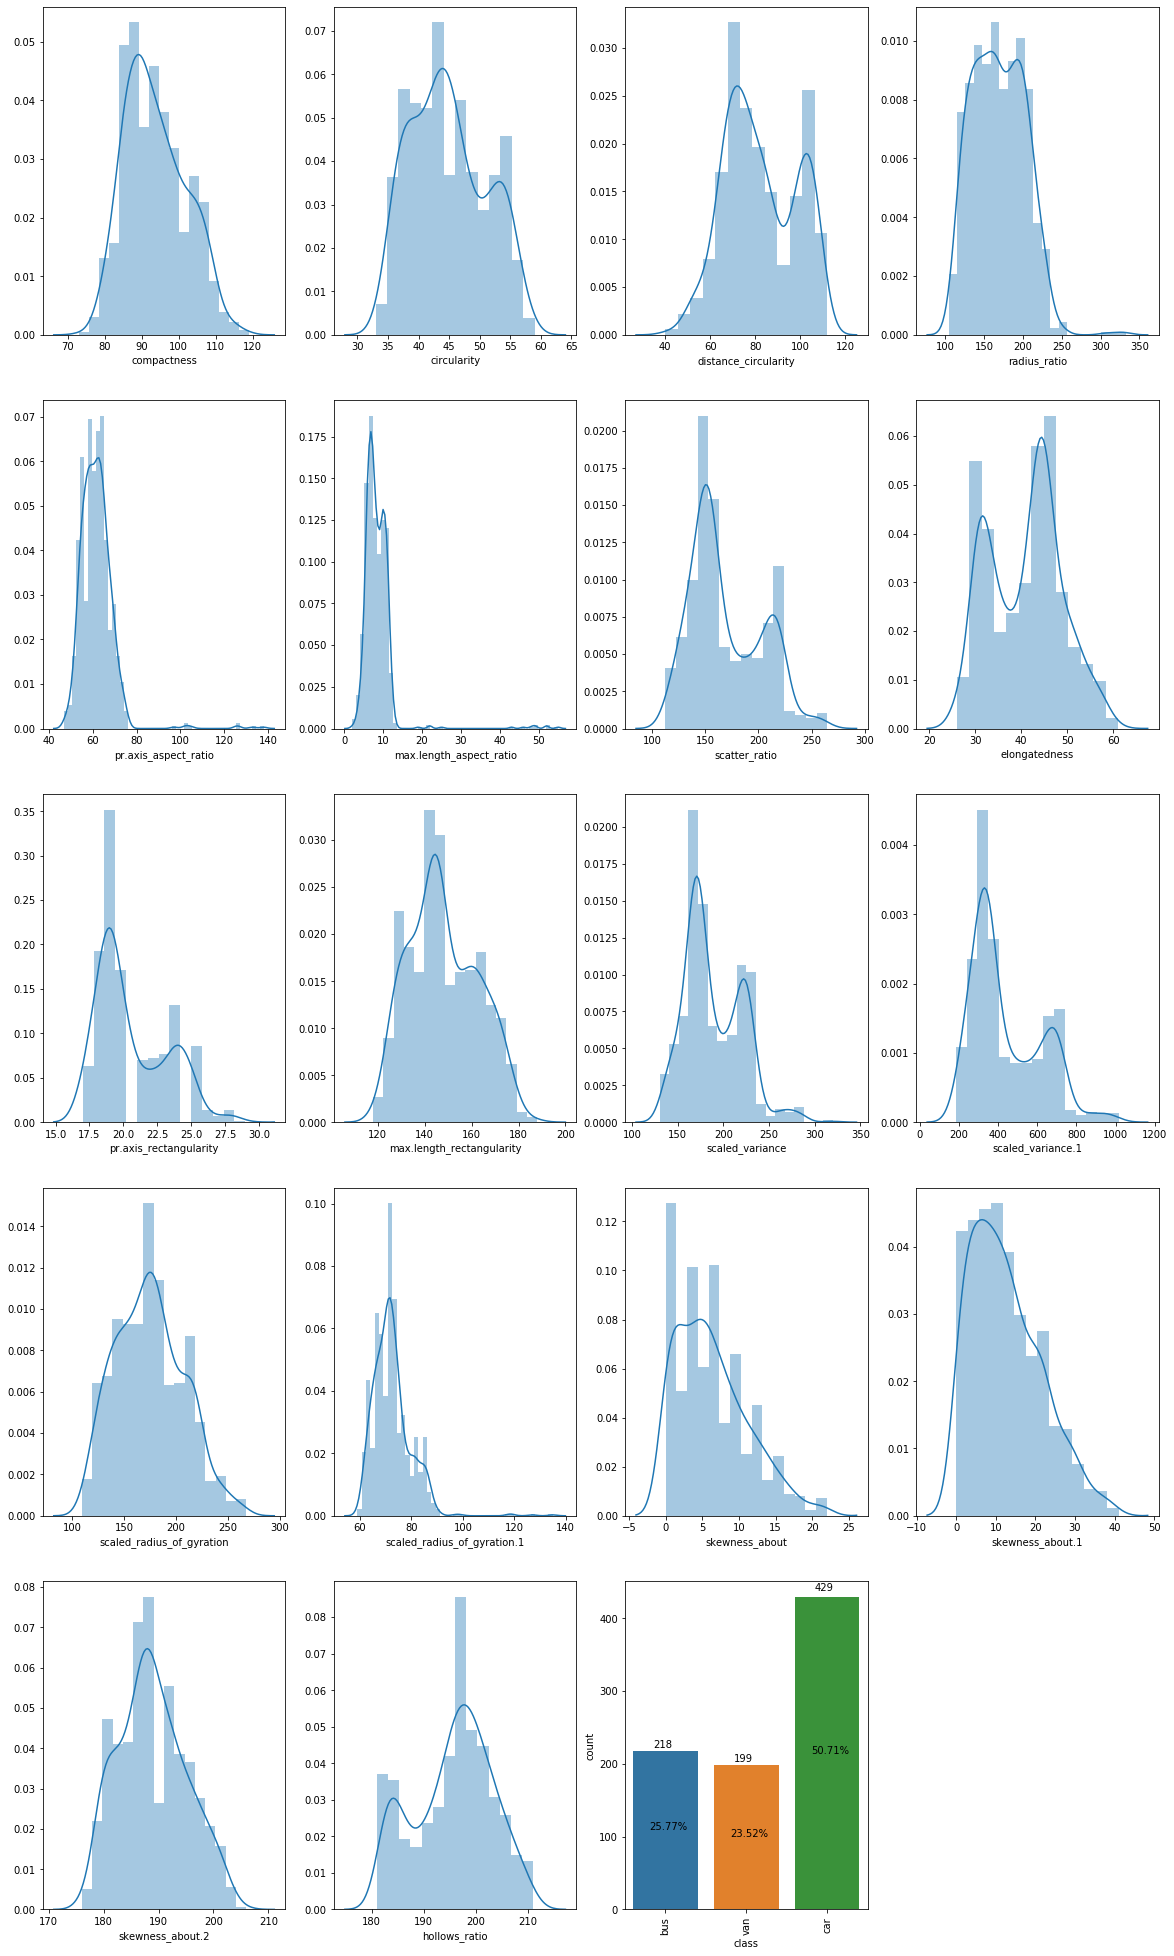

In [16]:
plt.figure(figsize=(20,35))
pos = 1
for feature in df_vehicle.columns:
    plt.subplot(5,4,pos)
    if feature in ['class']:
        ax=sns.countplot(df_vehicle[feature]) #only class attribute is categorical hence countplot
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        for p in ax.patches:
            ax.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()*1.02))
            ax.annotate('{:.2f}%'.format((p.get_height()/len(vehicle.index))*100), (p.get_x()+0.2, p.get_height()/2))
    else:
        sns.distplot(df_vehicle[feature]) #distplot to see the distribution of all the other attributes
    pos+=1

- The attributes contain more than one peak.
- The attributes such as pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_radius_of_gyration.1 have extreme values towards one end
- The records are more for car which accounts for 50.7%. out of the remaining data, 25.77% are for bus and 23.5% for van.

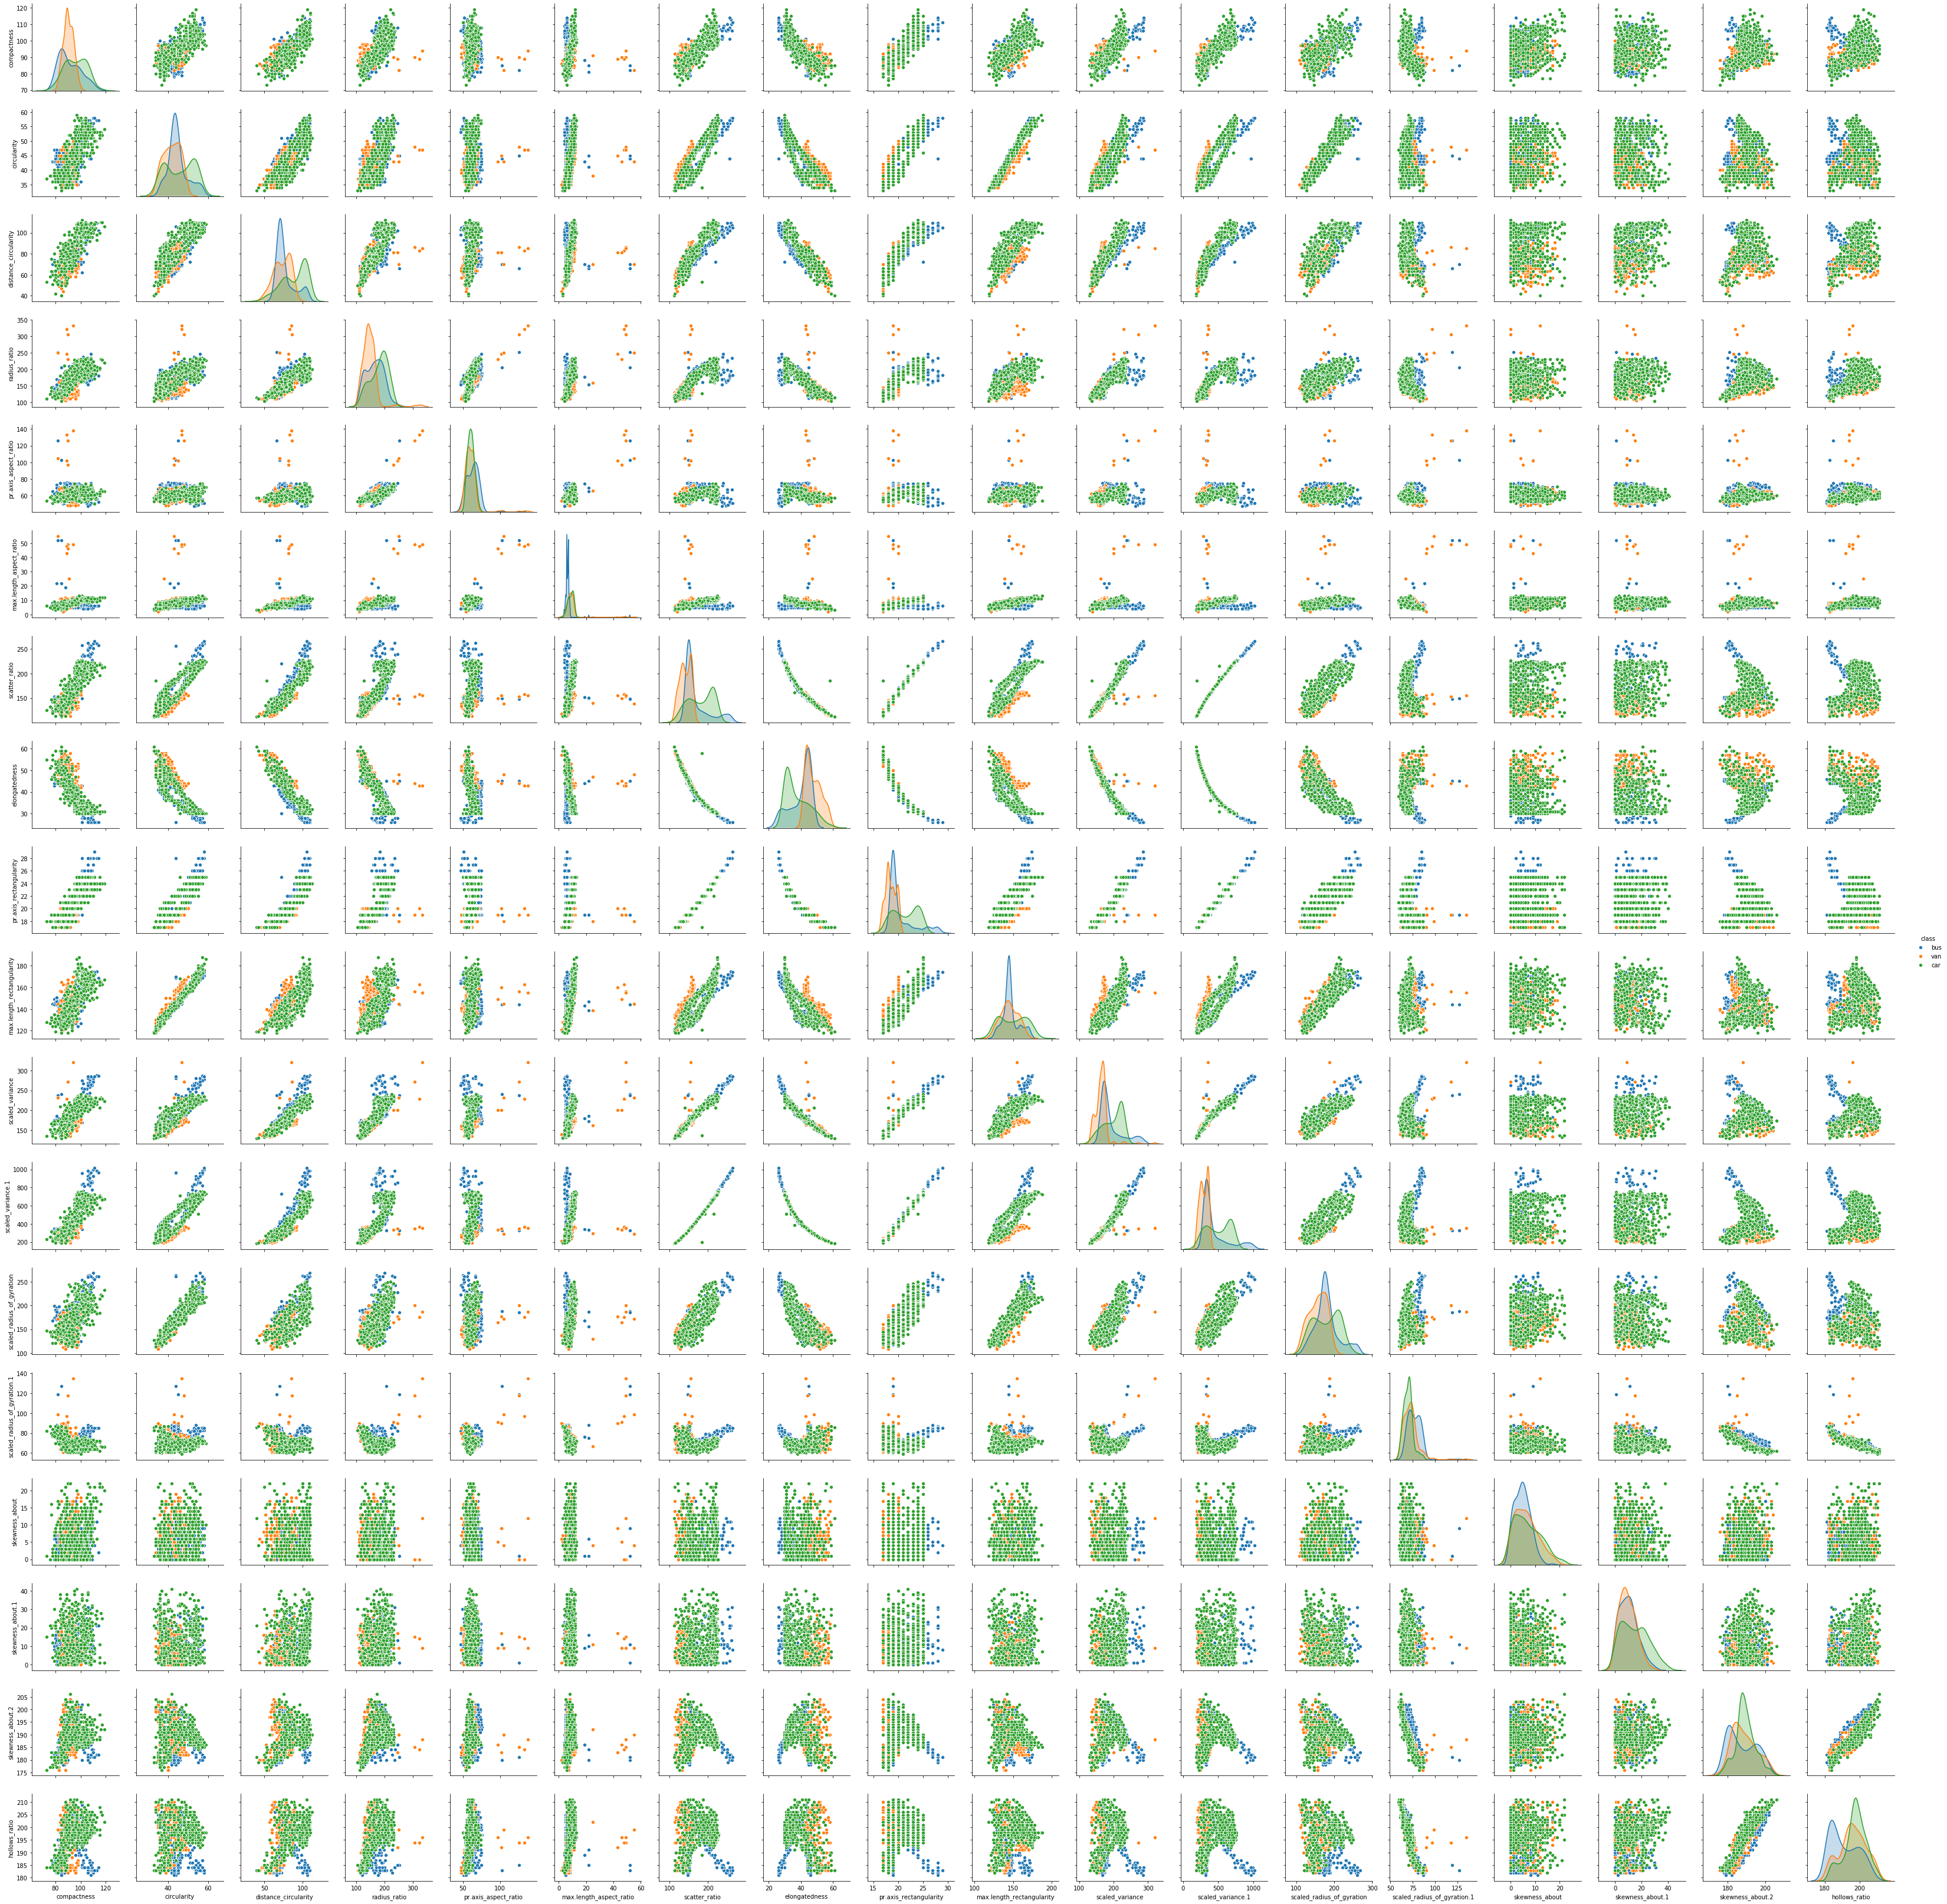

In [17]:
sns.pairplot(df_vehicle,diag_kind='kde', hue="class") #pairplot to find the relation between the attributes

(18, 0)

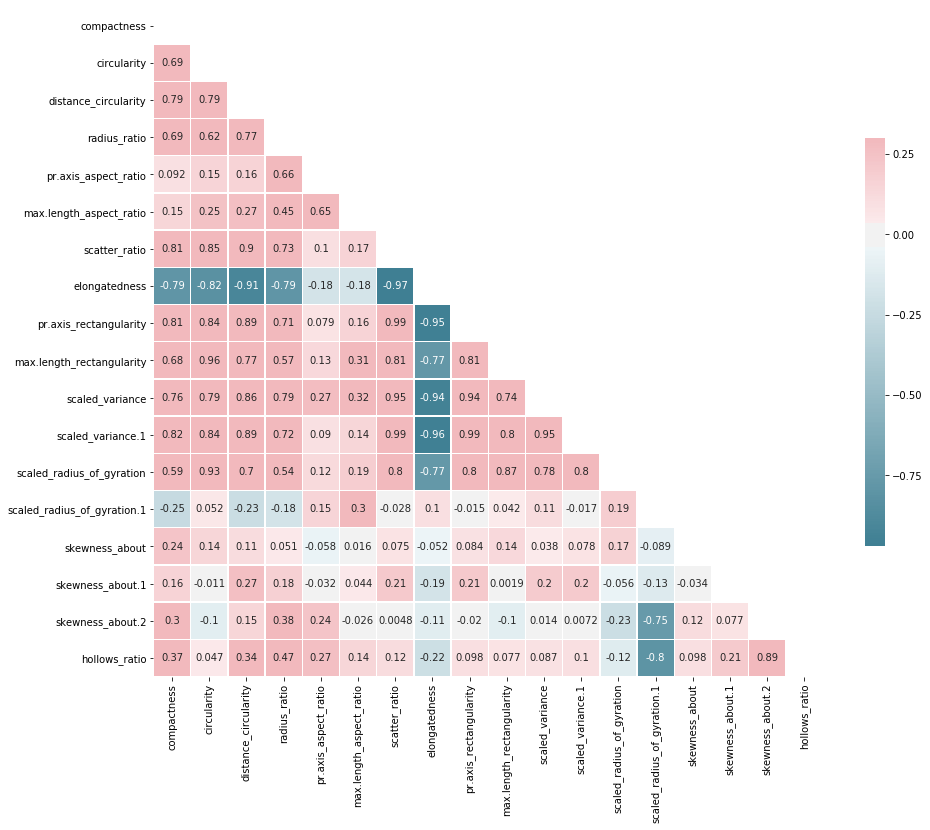

In [18]:
# Compute the correlation matrix
corr = df_vehicle.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax1 = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
ax1.set_ylim([corr.shape[1],0])

- There is positive correlation between scatter_ratio and pr.axis_rectangulariy, scatter_ratio and scaled_variance, scatter_ratio and scaled_variance.1
- There is high positive correlation between scaled_variance and scaled_variance.1
- There is high positive correlation between pr.axis_rectangularity and scaled_variance.1, scaled_variance.
- There is high negative correlation between elongatedness and scaled_variance.1, scaled_variance
- There is high negative correlation between elongatedness and distance_circularity
- There is high positive correlation between circularity and scaled_radius_of_gyration, max.length_rectangularity

### Dealing with outliers

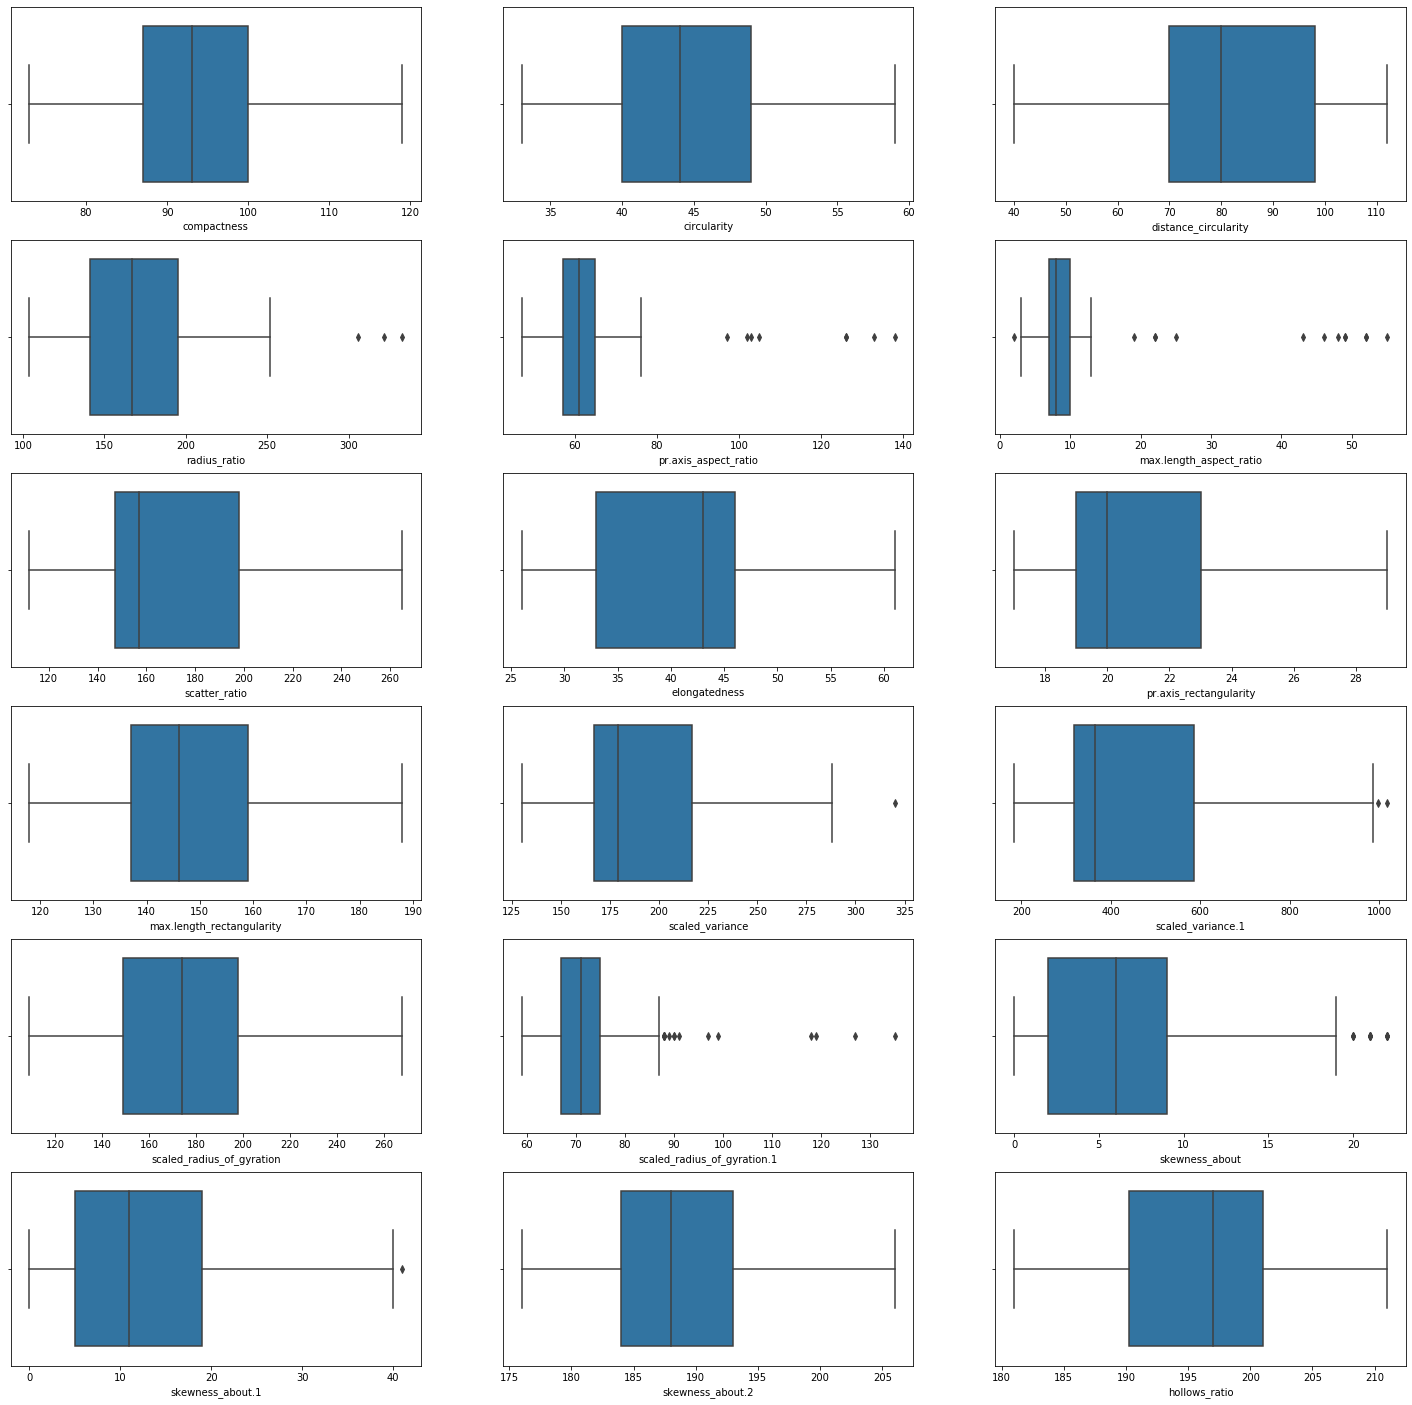

In [19]:
plt.figure(figsize=(25,25))
pos = 1
box_vehicle = df_vehicle.drop(['class'],axis=1)
for col in box_vehicle.columns:
    plt.subplot(6,3,pos)
    sns.boxplot(df_vehicle[col])
    pos+=1

There are outliers in the following attributes: radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002023647A188>,
      dtype=object)

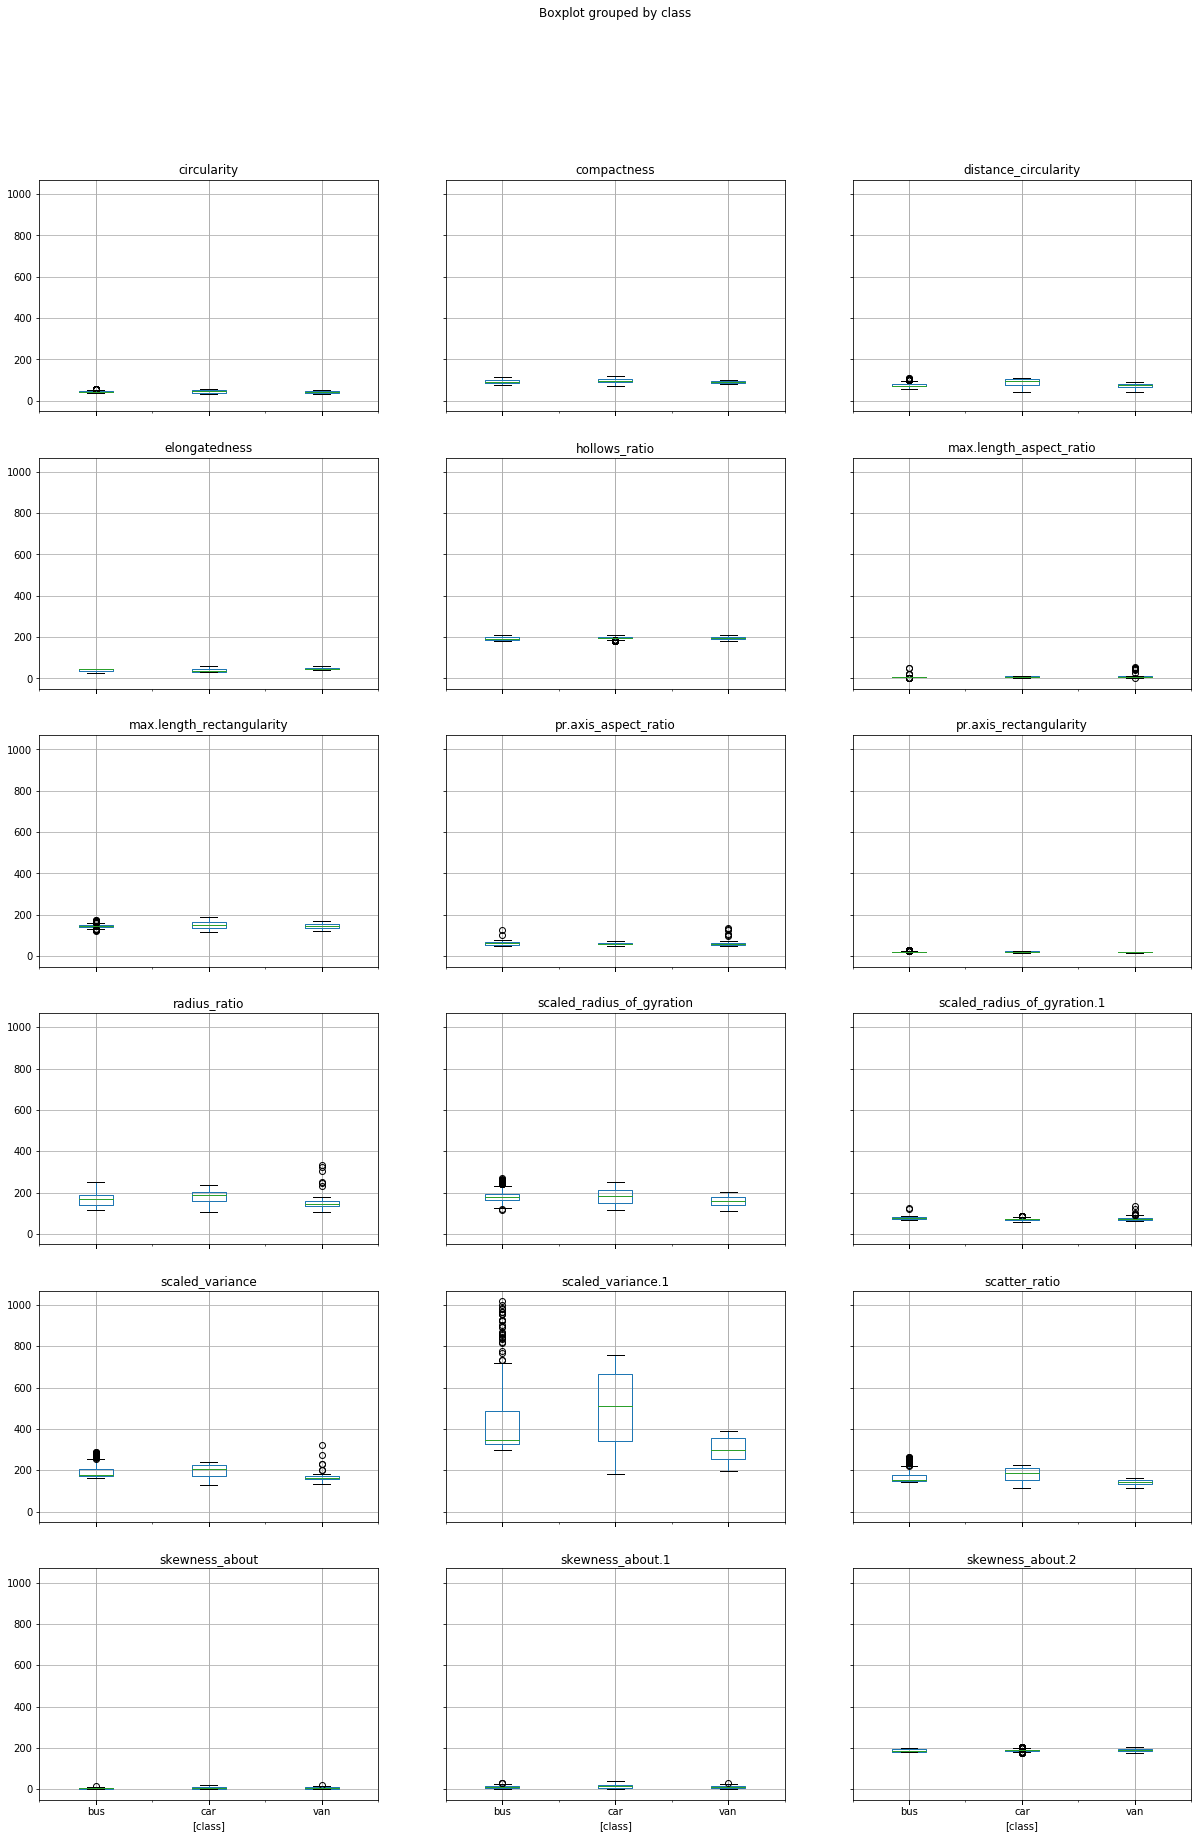

In [20]:
df_vehicle.boxplot(by='class',layout=(6,3), figsize=(20,30))

- In case of class bus, there are outliers in attributes such as circularity, distance_circularity, max.length_aspect_ratio, max.length_rectangularity, pr.axis_aspect_ratio, pr.axis_rectangularity, scaled_radius_of_gyration, scaled_radius_of_gyration.1, scaled_variance, scaled_variance.1, scatter_ratio, skewness_about, skewness_about.1
- In case of class car, there are outliers in scaled_radius_of_gyration.1 and skewness_about.2
- In case of class van, there are outliers in max.length_aspect_ratio, pr.axis_aspect_ration, radius_ratio, scaled_radius_of_gyration.1, scaled_variance, skewness_about, skewness_about.1

- The outliers are mostly found in class bus.
- Outliers are more only in scaled_variance.1 attribute.

In [21]:
#function to find outliers range
def outlierhandle(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3-q1
    high = q3+1.5*iqr
    outlier = column[(column > high)]
    print("The maximum outlier is",np.max(outlier))
    print("The minimum outlier is",np.min(outlier))

In [22]:
 #finding the outliers in radius_ratio attribute
outlierhandle(df_vehicle['radius_ratio'])

The maximum outlier is 333.0
The minimum outlier is 306.0


In [23]:
 #finding the outliers in radius_ratio attribute
df_vehicle[['radius_ratio','class']].sort_values(by='radius_ratio',ascending = False).head(10)

radius_ratio class
388         333.0   van
135         322.0   van
37          306.0   van
100         252.0   bus
706         250.0   van
291         246.0   van
556         246.0   bus
444         238.0   bus
687         235.0   bus
620         234.0   car

In [24]:
#the outliers belongs to class van.Replacing the outliers with mean value of the column in class van
df_vehicle.loc[[37,135,388],'radius_ratio']=df_vehicle[df_vehicle['class']=='van']['radius_ratio'].mean()

In [25]:
 #finding the outliers in pr.axis_aspect_ratio attribute
outlierhandle(df_vehicle['pr.axis_aspect_ratio'])

The maximum outlier is 138.0
The minimum outlier is 97.0


In [26]:
# finding the outliers columns and class in pr.axis_aspect_ratio
df_vehicle[['pr.axis_aspect_ratio','class']].sort_values(by='pr.axis_aspect_ratio',ascending=False).head(10)

pr.axis_aspect_ratio class
388                 138.0   van
135                 133.0   van
37                  126.0   van
100                 126.0   bus
706                 105.0   van
4                   103.0   bus
291                 102.0   van
523                  97.0   van
84                   76.0   bus
450                  75.0   bus

In [27]:
# out of the 8 outliers 2 belongs to bus and 6 belongs to van. Replacing the outliers with mean value of the respective classes
df_vehicle.loc[[388,135,37,706,291,523],'pr.axis_aspect_ratio']=df_vehicle[df_vehicle['class']=='van']['pr.axis_aspect_ratio'].mean()
df_vehicle.loc[[100,4],'pr.axis_aspect_ratio']=df_vehicle[df_vehicle['class']=='bus']['pr.axis_aspect_ratio'].mean()

In [28]:
# finding the outliers in max.length_aspect_ratio
outlierhandle(df_vehicle['max.length_aspect_ratio'])

The maximum outlier is 55
The minimum outlier is 19


In [29]:
# finding the outliers columns and class
df_vehicle[['max.length_aspect_ratio','class']].sort_values(by='max.length_aspect_ratio',ascending=False).head(15)

max.length_aspect_ratio class
706                       55   van
4                         52   bus
100                       52   bus
388                       49   van
37                        49   van
135                       48   van
523                       46   van
291                       43   van
391                       25   van
815                       22   bus
127                       22   bus
544                       19   bus
220                       13   car
827                       13   car
476                       13   car

In [30]:
# out of the 12 outliers 5 belongs to bus and 7 belongs to van. Replacing the outliers with mean value of the respective classes
df_vehicle.loc[[4,100,815,127,544],'max.length_aspect_ratio']=df_vehicle[df_vehicle['class']=='bus']['max.length_aspect_ratio'].mean()
df_vehicle.loc[[706,388,37,135,523,291,391],'max.length_aspect_ratio']=df_vehicle[df_vehicle['class']=='van']['max.length_aspect_ratio'].mean()

In [31]:
# finding the outliers in scaled_variance
outlierhandle(df_vehicle['scaled_variance'])

The maximum outlier is 320.0
The minimum outlier is 320.0


In [32]:
# finding the outlier in scaled_variance
df_vehicle[['scaled_variance','class']].sort_values(by=['scaled_variance'],ascending=False).head(5)

scaled_variance class
388            320.0   van
321            288.0   bus
733            287.0   bus
687            285.0   bus
835            285.0   bus

In [33]:
# the outlier belongs to van, Replacing the outliers with mean value of the class van
df_vehicle.loc[[388],'scaled_variance'] = df_vehicle[df_vehicle['class']=='van']['scaled_variance'].mean()

In [34]:
# finding the outliers in scaled_variance.1
outlierhandle(df_vehicle['scaled_variance.1'])

The maximum outlier is 1018.0
The minimum outlier is 998.0


In [35]:
# finding the outlier in scaled_variance.1
df_vehicle[['scaled_variance.1','class']].sort_values(by=['scaled_variance.1'],ascending=False).head(5)

scaled_variance.1 class
835             1018.0   bus
85               998.0   bus
687              987.0   bus
321              982.0   bus
733              968.0   bus

In [36]:
#the outlier belongs to bus, Replacing the outliers with mean value of the class bus
df_vehicle.loc[[835,85],'scaled_variance.1']=df_vehicle[df_vehicle['class']=='bus']['scaled_variance.1'].mean()

In [37]:
# finding the outliers in scaled_radius_of_gyration.1
outlierhandle(df_vehicle['scaled_radius_of_gyration.1'])

The maximum outlier is 135.0
The minimum outlier is 88.0


In [38]:
# finding the number of rows having scaled_radius_of_gyration greater than or equal to 88
df_vehicle[df_vehicle['scaled_radius_of_gyration.1']>=88]['class'].value_counts()

van    9
bus    6
Name: class, dtype: int64

In [39]:
# replacing the outliers with mean values of respective classes
df_vehicle.loc[(df_vehicle['scaled_radius_of_gyration.1']>=88) & (df_vehicle['class']=='van'), 'scaled_radius_of_gyration.1'] = df_vehicle[df_vehicle['class']=='van']['scaled_radius_of_gyration.1'].mean()
df_vehicle.loc[(df_vehicle['scaled_radius_of_gyration.1']>=88) & (df_vehicle['class']=='bus'), 'scaled_radius_of_gyration.1'] = df_vehicle[df_vehicle['class']=='bus']['scaled_radius_of_gyration.1'].mean()

In [40]:
# finding the outliers in skewness_about
outlierhandle(df_vehicle['skewness_about'])

The maximum outlier is 22.0
The minimum outlier is 20.0


In [41]:
# finding the number of rows having values greater than or equal to 20
df_vehicle[df_vehicle['skewness_about']>=20]['class'].value_counts()

car    12
Name: class, dtype: int64

In [42]:
# replacing the outliers with mean value of car.
df_vehicle.loc[(df_vehicle['skewness_about']>=20) & (df_vehicle['class']=='car'), 'skewness_about'] = df_vehicle[df_vehicle['class']=='car']['skewness_about'].mean()

In [43]:
# finding the outliers in skewness_about.1
outlierhandle(df_vehicle['skewness_about.1'])

The maximum outlier is 41.0
The minimum outlier is 41.0


In [44]:
# finding the number of rows having values greater than or equal to 10
df_vehicle[df_vehicle['skewness_about.1']>=41]['class'].value_counts()

car    1
Name: class, dtype: int64

In [45]:
#replacing outliers of class car with mean value
df_vehicle.loc[[132],'skewness_about.1']=df_vehicle[df_vehicle['class']=='car']['skewness_about.1'].mean()

## Data post outlier handling

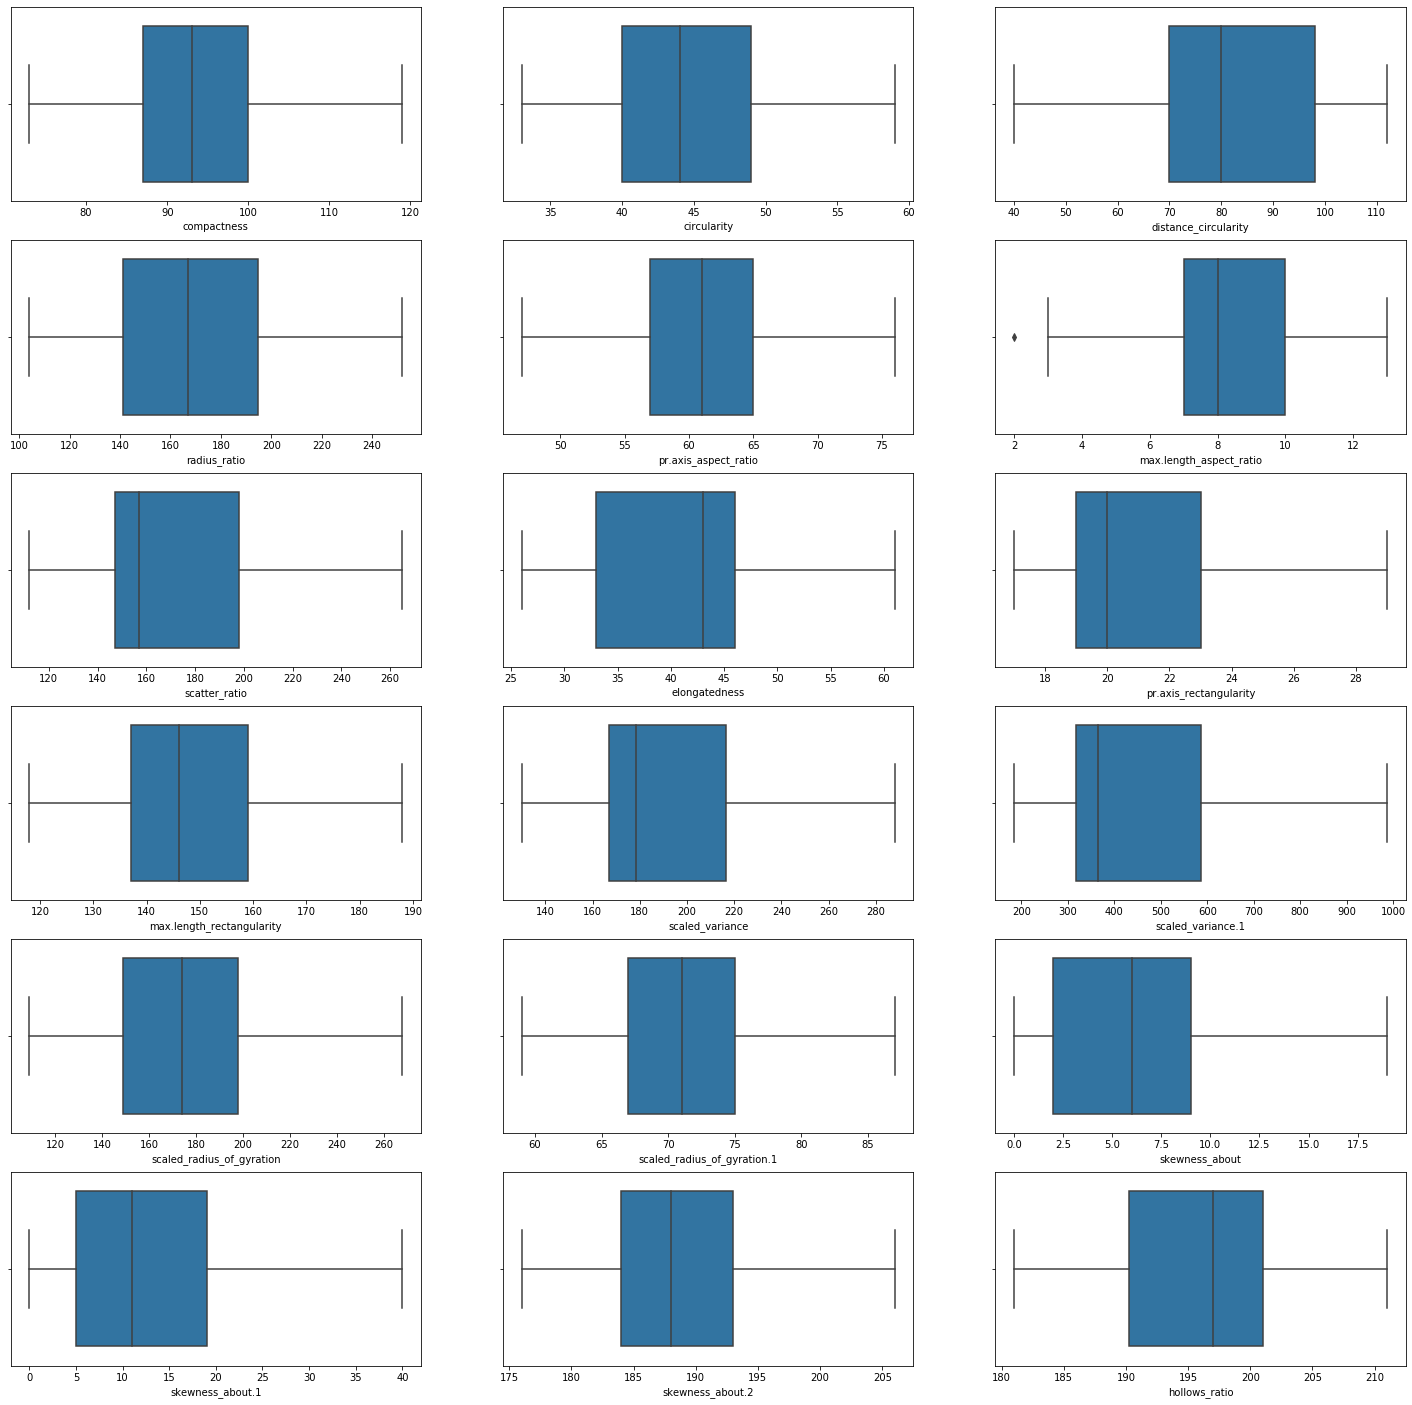

In [46]:
# box plot after handing of outlies
plt.figure(figsize=(25,25))
pos = 1
box_vehicle = df_vehicle.drop(['class'],axis=1)
for col in box_vehicle.columns:
    plt.subplot(6,3,pos)
    sns.boxplot(df_vehicle[col])
    pos+=1

### 3. Split the data into train and test

#### Scaling of data

In [47]:
vehicle_encoded = copy.deepcopy(df_vehicle)# taking copy of vehicle dataframe

In [48]:
vehicleattr = vehicle_encoded.iloc[:,0:18]#Leaving the class attribute which is categorical

In [49]:
vehiclescaled = vehicleattr.apply(zscore) #scaling the attributes using zscore

In [50]:
#independent variables
X = vehiclescaled
#dependent variable
y = vehicle_encoded['class']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

### 4. Train support vector machine

Training Data score 0.981418918918919
Test Data score 0.9606299212598425


              precision    recall  f1-score   support

         bus       0.96      1.00      0.98        69
         car       0.99      0.95      0.97       132
         van       0.89      0.94      0.92        53

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254



C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[Text(0, 0.5, 'bus'), Text(0, 1.5, 'car'), Text(0, 2.5, 'van')]

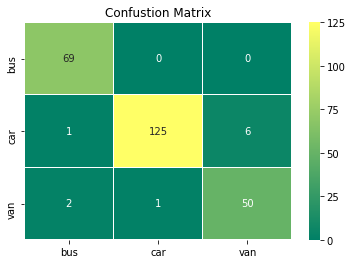

In [52]:
svc_org = SVC()
svc_org.fit(X_train,y_train)
prediction = svc_org.predict(X_test)
print("Training Data score", svc_org.score(X_train,y_train))
print("Test Data score", svc_org.score(X_test,y_test))
print("\n")

import warnings
warnings.filterwarnings("ignore")

class_names = ['bus','car','van']
print(metrics.classification_report(y_test,prediction,target_names = class_names))

cm = metrics.confusion_matrix(y_test,prediction,class_names) 
ax = sns.heatmap(cm, annot=True, linewidths=0.25, fmt= '1d',cmap="summer")
plt.title("Confustion Matrix")
ax.set_ylim([cm.shape[1],0])
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

- The accuracy of SVC on training data set is 0.98
- The accuracy of SVC on test data is 0.96

### K-fold cross-validation

In [53]:
num_folds = 50
seeds = 42
kfold = KFold(n_splits=num_folds,random_state=seeds)
results = cross_val_score(svc_org,X,y,cv=kfold)
print(results)
print("Accuracy with SVM on original data: %0.4f (+/- %0.4f)" % (results.mean(), results.std() * 2))

[0.88235294 0.94117647 1.         1.         1.         1.
 1.         1.         0.94117647 1.         0.94117647 1.
 1.         0.94117647 0.94117647 0.94117647 0.94117647 0.94117647
 0.94117647 0.82352941 0.82352941 0.88235294 1.         0.88235294
 0.94117647 0.94117647 1.         0.88235294 1.         1.
 0.88235294 1.         1.         0.94117647 1.         1.
 1.         1.         1.         1.         0.94117647 0.94117647
 0.82352941 1.         0.88235294 1.         1.         1.
 0.9375     1.        ]
Accuracy with SVM on original data: 0.9576 (+/- 0.1054)


- the Kfold cross validation gives an accuracy score of 0.9576 with 2 standard deviation of 0.105
- The value within 95% of the bell curve is 0.9576 +/- 0.1054

### Hyperparameter tuning using GridSearch

In [54]:
param_grid = [{'kernel':['linear'], 'C':[0.01,0.05,0.5,1.0,10,25,50]},
             {'kernel':['rbf'], 'C':[0.01,0.05,0.5,1.0,10,25,20]}]
clf = GridSearchCV (SVC(),param_grid)
clf.fit(X_train,y_train)
print("Best Parameters:\n", clf.best_params_)
print("Best Estimators:\n", clf.best_estimator_)

Best Parameters:
 {'C': 25, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


The best hyperparameters for SVC are C=25 and kernel =rbf

### SVC using hyperparameters from GridSearchCV

Training Data score 1.0
Test Data score 0.9724409448818898


              precision    recall  f1-score   support

         bus       0.99      0.99      0.99        69
         car       0.98      0.96      0.97       132
         van       0.93      0.98      0.95        53

    accuracy                           0.97       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.97      0.97      0.97       254



[Text(0, 0.5, 'bus'), Text(0, 1.5, 'car'), Text(0, 2.5, 'van')]

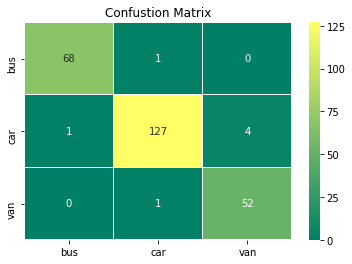

In [55]:
svc_org = SVC(C=25,kernel='rbf')
svc_org.fit(X_train,y_train)
prediction = svc_org.predict(X_test)
print("Training Data score", svc_org.score(X_train,y_train))
print("Test Data score", svc_org.score(X_test,y_test))
print("\n")


class_names = ['bus','car','van']
print(metrics.classification_report(y_test,prediction,target_names = class_names))

cm = metrics.confusion_matrix(y_test,prediction,class_names) 
ax = sns.heatmap(cm, annot=True, linewidths=0.25, fmt= '1d',cmap="summer")
plt.title("Confustion Matrix")
ax.set_ylim([cm.shape[1],0])
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

The model which was fit using hyperparameters obtained using GridSearchCV gives better results

### PCA

In [56]:
covMatrix = np.cov(vehiclescaled,rowvar=False)
print("CoVariance Matirx :\n")
covMatrix

CoVariance Matirx :



array([[ 1.00118343,  0.68636217,  0.79059726,  0.72284749,  0.19206398,
         0.49909434,  0.81247773, -0.78905557,  0.81440865,  0.67694334,
         0.77104577,  0.81305815,  0.58575426, -0.25305976,  0.20235319,
         0.15744887,  0.29887839,  0.36598446],
       [ 0.68636217,  1.00118343,  0.79280285,  0.63876625,  0.20413366,
         0.56235882,  0.84770943, -0.8218075 ,  0.84576918,  0.96297741,
         0.80118342,  0.83439963,  0.92731344,  0.06897178,  0.13824735,
        -0.00992531, -0.10494782,  0.04657999],
       [ 0.79059726,  0.79280285,  1.00118343,  0.79528346,  0.24430951,
         0.67189004,  0.90342716, -0.91177521,  0.89389345,  0.77443553,
         0.86926249,  0.8883019 ,  0.70519293, -0.23715856,  0.10086064,
         0.2645976 ,  0.14777577,  0.33545957],
       [ 0.72284749,  0.63876625,  0.79528346,  1.00118343,  0.65296854,
         0.46863208,  0.77046664, -0.82699676,  0.74619402,  0.57872596,
         0.78484001,  0.76557312,  0.55036082, -0.389

In [57]:
pca1 = PCA(n_components=len(vehiclescaled.columns),random_state=42)
pca1.fit(vehiclescaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
print("Original number of attributes:", len(vehiclescaled.columns))
print()
print("Eigen values:\n", pca1.explained_variance_)
print()
print("Eigen Vectors:\n", pca1.components_)

Original number of attributes: 18

Eigen values:
 [9.75743075e+00 3.36564189e+00 1.19375734e+00 1.13887339e+00
 8.84833003e-01 6.66838966e-01 3.14372801e-01 2.24175882e-01
 1.21364071e-01 8.00191230e-02 7.18334829e-02 6.05148892e-02
 3.76400664e-02 3.26828642e-02 2.79800829e-02 1.89977371e-02
 1.74514450e-02 6.89398470e-03]

Eigen Vectors:
 [[ 2.72462257e-01  2.87130631e-01  3.02217592e-01  2.69692359e-01
   9.77550800e-02  1.95553648e-01  3.09948080e-01 -3.08713580e-01
   3.07361306e-01  2.77971696e-01  2.99578035e-01  3.06749253e-01
   2.62918127e-01 -4.26761294e-02  3.69025323e-02  5.92547836e-02
   3.81857055e-02  8.49829298e-02]
 [-8.69721411e-02  1.31610399e-01 -4.75568567e-02 -1.96471293e-01
  -2.55227398e-01 -1.10361532e-01  7.55348923e-02 -1.36367611e-02
   8.84649822e-02  1.21949491e-01  7.79598131e-02  7.25414768e-02
   2.10991034e-01  5.05155058e-01 -1.89260288e-02 -9.28266599e-02
  -5.01090031e-01 -5.07185341e-01]
 [-3.85999590e-02 -2.03260336e-01  6.39106639e-02  5.530087

In [59]:
print("Percentage of variance explained:\n", pca1.explained_variance_ratio_)

Percentage of variance explained:
 [5.41438730e-01 1.86759088e-01 6.62414601e-02 6.31959560e-02
 4.90992834e-02 3.70028189e-02 1.74445112e-02 1.24394944e-02
 6.73447857e-03 4.44025210e-03 3.98603185e-03 3.35796437e-03
 2.08864303e-03 1.81356845e-03 1.55261164e-03 1.05418228e-03
 9.68378714e-04 3.82546433e-04]


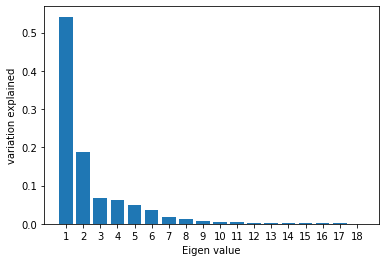

In [60]:
plt.bar(list(range(1,19)),pca1.explained_variance_ratio_,align='center')
plt.xticks(np.arange(1,19,1.0))
plt.xlabel('Eigen value')
plt.ylabel('variation explained')
plt.show()

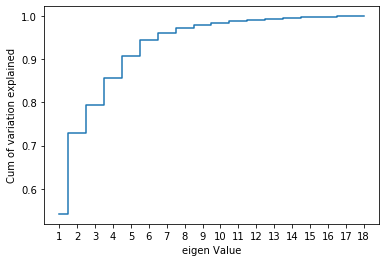

In [61]:
plt.step(list(range(1,19)),np.cumsum(pca1.explained_variance_ratio_),where='mid')
plt.xticks(np.arange(1,19,1.0))
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

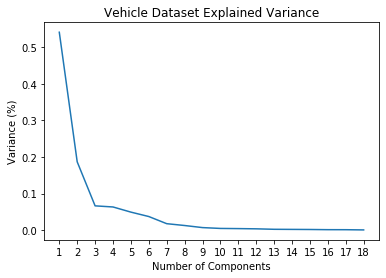

In [62]:
#Elbow plot
plt.figure()
plt.plot(list(range(1,19)),pca1.explained_variance_ratio_)
plt.xticks(np.arange(1,19,1.0))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Vehicle Dataset Explained Variance')
plt.show()

### Dimensionality Reduction

Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!

In [63]:
pcar = PCA(n_components=8,random_state=42)
pcar.fit(vehiclescaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
Xpca1 = pcar.fit_transform(vehiclescaled)
print('Original number of features:', len(vehiclescaled.columns))
print('Reduced number of features:', Xpca1.shape[1])
print(Xpca1.shape)
Xpca1_df=pd.DataFrame(data = Xpca1)

Original number of features: 18
Reduced number of features: 8
(846, 8)


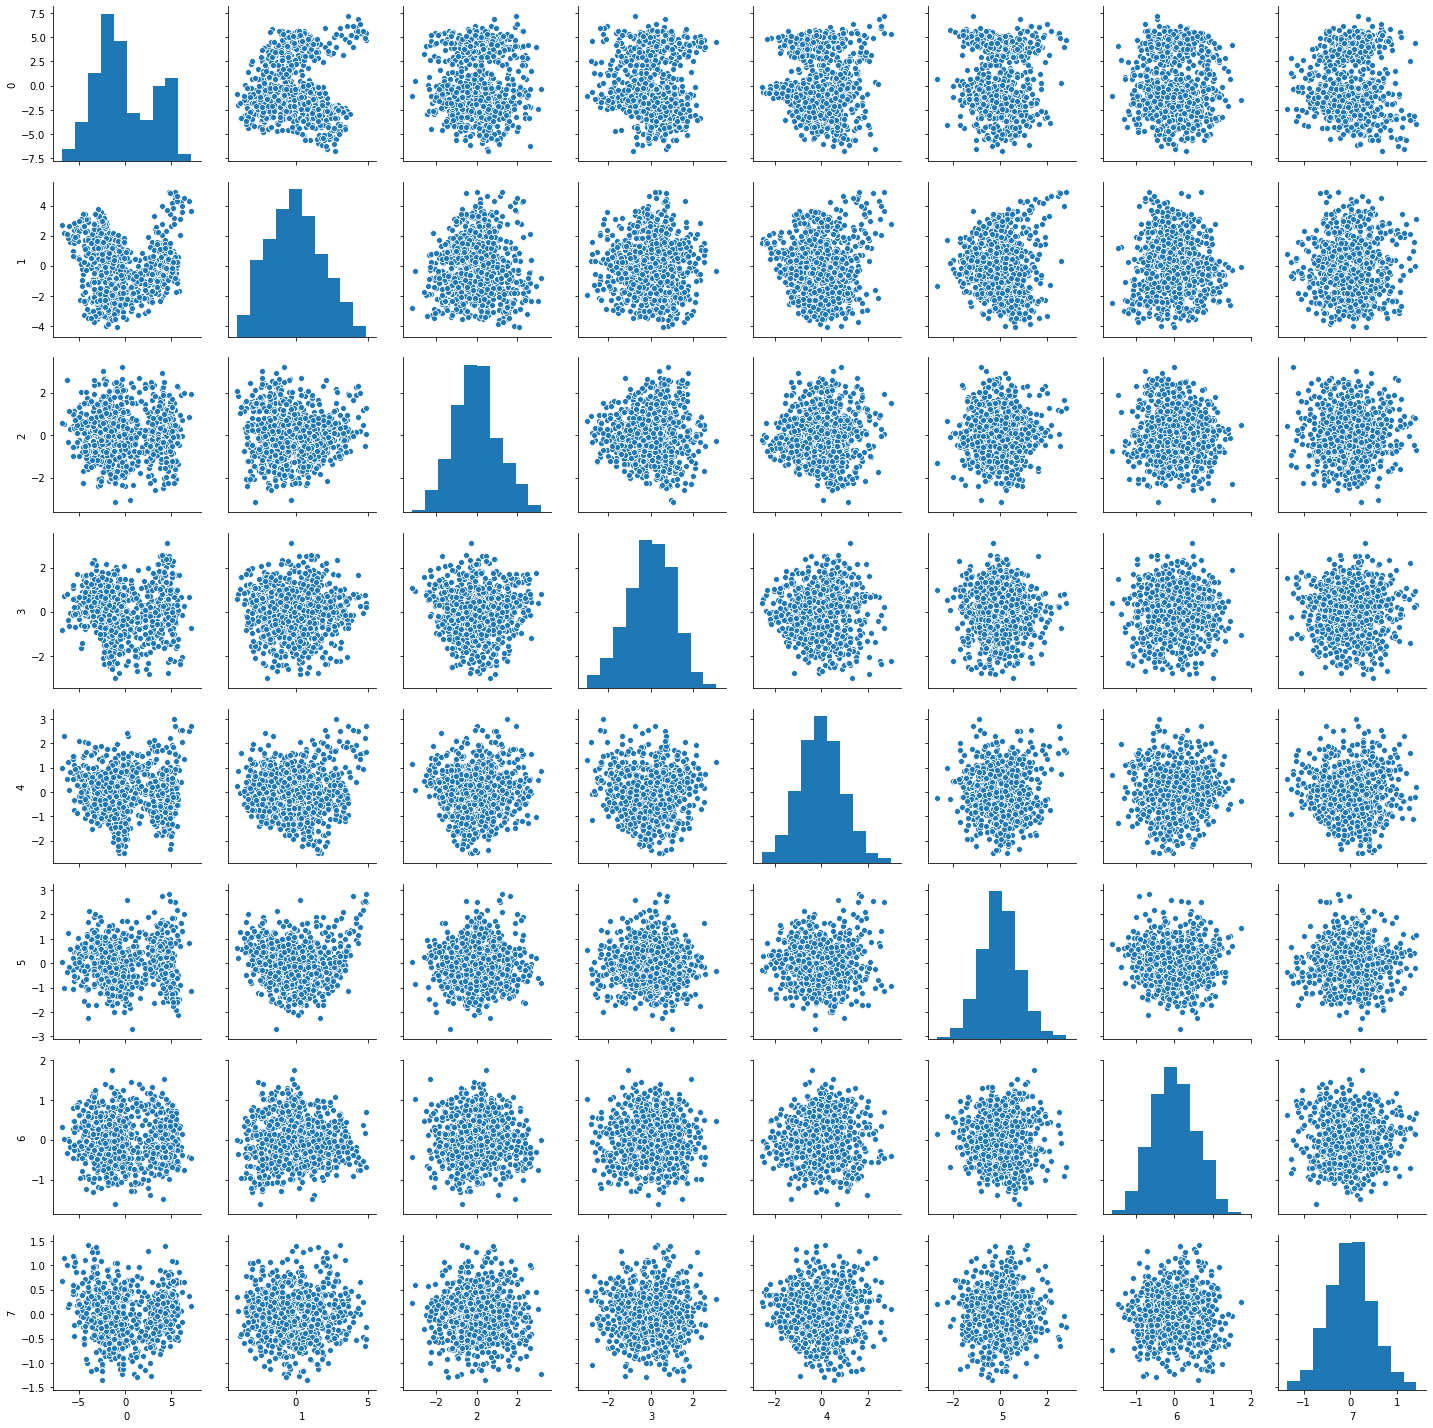

In [65]:
sns.pairplot(Xpca1_df)

### Comparing various models using SVM

In [66]:
plt.figure(figsize=(20,35)) # set the figure size

def conf_mat(cm):
    class_names = ['bus','car','van']
    cm = metrics.confusion_matrix(y_test,prediction,class_names) 
    ax = sns.heatmap(cm, annot=True, linewidths=0.25, fmt= '1d',cmap="summer")
    plt.title("Confustion Matrix")
    ax.set_ylim([cm.shape[1],0])
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

<Figure size 1440x2520 with 0 Axes>

Training Data score 1.0
Test Data score 0.9724409448818898


              precision    recall  f1-score   support

         bus       0.99      0.99      0.99        69
         car       0.98      0.96      0.97       132
         van       0.93      0.98      0.95        53

    accuracy                           0.97       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.97      0.97      0.97       254



[Text(0, 0.5, 'bus'), Text(0, 1.5, 'car'), Text(0, 2.5, 'van')]

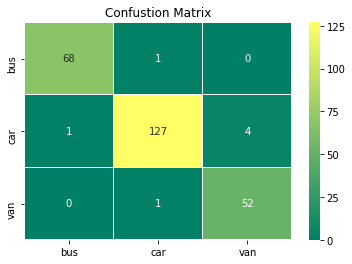

In [67]:
svc_org = SVC(C=25,kernel='rbf')
svc_org.fit(X_train,y_train)
prediction = svc_org.predict(X_test)
print("Training Data score", svc_org.score(X_train,y_train))
print("Test Data score", svc_org.score(X_test,y_test))
print("\n")


class_names = ['bus','car','van']
print(metrics.classification_report(y_test,prediction,target_names = class_names))

cm = metrics.confusion_matrix(y_test,prediction,class_names) 
ax = sns.heatmap(cm, annot=True, linewidths=0.25, fmt= '1d',cmap="summer")
plt.title("Confustion Matrix")
ax.set_ylim([cm.shape[1],0])
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

In [68]:
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(Xpca1_df,y,test_size=0.3,random_state=42)

Training Data score 0.9983108108108109
Test Data score 0.9724409448818898


              precision    recall  f1-score   support

         bus       0.99      1.00      0.99        69
         car       0.98      0.96      0.97       132
         van       0.93      0.96      0.94        53

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



[Text(0, 0.5, 'bus'), Text(0, 1.5, 'car'), Text(0, 2.5, 'van')]

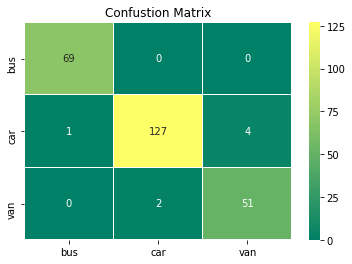

In [69]:
svc_pca = SVC(C=25,kernel='rbf')
svc_pca.fit(X_new_train,y_new_train)
prediction = svc_pca.predict(X_new_test)
print("Training Data score", svc_pca.score(X_new_train,y_new_train))
print("Test Data score", svc_pca.score(X_new_test,y_new_test)) 
print("\n")


class_names = ['bus','car','van']
print(metrics.classification_report(y_test,prediction,target_names = class_names))

cm = metrics.confusion_matrix(y_test,prediction,class_names) 
ax = sns.heatmap(cm, annot=True, linewidths=0.25, fmt= '1d',cmap="summer")
plt.title("Confustion Matrix")
ax.set_ylim([cm.shape[1],0])
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

- The data count in the confusion matrix only varies by 1 or 2 values before and after PCA.
- There is no much difference in accuracy, precision and recall scores before and after PCA.

In [74]:
pred_kfold = cross_val_score(svc_org, vehiclescaled, y, cv=10) 
print("Accuracy with SVM on original data: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

post_kfold = cross_val_score(svc_pca, Xpca1_df , y, cv=10) 
print("Accuracy with SVM on PCA data: %0.2f (+/- %0.2f)" % (post_kfold.mean(), post_kfold.std() * 2))


Accuracy with SVM on original data: 0.98 (+/- 0.03)
Accuracy with SVM on PCA data: 0.95 (+/- 0.06)


- The accuracy of the SVM on original data with 18 dimension is 0.98 with 2 standard deviation of +/-0.03
- The accuracy of the SVM on data post PCA with 8 dimensions is 0.95 with 2 standard deviation of +/- 0.06
- Though accuracy has reduced a little, we are getting the accuracy of 0.95 on 8 dimensions compared to 0.98 on original data of 18 dimensions.

In [73]:
pred_kfold = cross_val_score(svc_org, vehiclescaled, y, cv=kfold) 
print("Accuracy with SVM on original data: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

post_kfold = cross_val_score(svc_pca, Xpca1_df , y, cv=kfold) 
print("Accuracy with SVM on PCA data: %0.2f (+/- %0.2f)" % (post_kfold.mean(), post_kfold.std() * 2))


Accuracy with SVM on original data: 0.98 (+/- 0.08)
Accuracy with SVM on PCA data: 0.95 (+/- 0.11)
